**Integrantes:** 
- Marcos Contreras
- Alessandro Bravo
- Jhair Quispe


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.feature import match_template
import cv2

In [2]:
! gdown "1Y5uPH-fbzegtdknZLLrMkhJaECLqvCRX" -O "ImagenA.png"

Downloading...
From: https://drive.google.com/uc?id=1Y5uPH-fbzegtdknZLLrMkhJaECLqvCRX
To: c:\Users\jayka\OneDrive\Documentos\Courses\image-processing\week7\ImagenA.png

  0%|          | 0.00/197k [00:00<?, ?B/s]
100%|██████████| 197k/197k [00:00<00:00, 490kB/s]
100%|██████████| 197k/197k [00:00<00:00, 489kB/s]


In [3]:
! gdown "1KBRO3AMWVLy_sTGanACzhhWuEDnRy9Pa" -O "ImagenB.png"


Downloading...
From: https://drive.google.com/uc?id=1KBRO3AMWVLy_sTGanACzhhWuEDnRy9Pa
To: c:\Users\jayka\OneDrive\Documentos\Courses\image-processing\week7\ImagenB.png

  0%|          | 0.00/32.4k [00:00<?, ?B/s]
100%|██████████| 32.4k/32.4k [00:00<00:00, 233kB/s]
100%|██████████| 32.4k/32.4k [00:00<00:00, 233kB/s]


In [4]:
imagen_A = imread("ImagenA.png")
imagen_B = imread("ImagenB.png")

In [5]:
imagen_A = cv2.cvtColor(imagen_A, cv2.COLOR_BGR2GRAY)
imagen_B = cv2.cvtColor(imagen_B, cv2.COLOR_BGR2GRAY)

In [6]:
hA, wA = imagen_A.shape
hB, wB = imagen_B.shape

if hB > hA or wB > wA:
    escala = min(hA / hB, wA / wB) * 0.5
    imagen_B = cv2.resize(imagen_B, (int(wB * escala), int(hB * escala)), interpolation=cv2.INTER_AREA)
    print(f"Imagen B redimensionada a {imagen_B.shape[::-1]}")

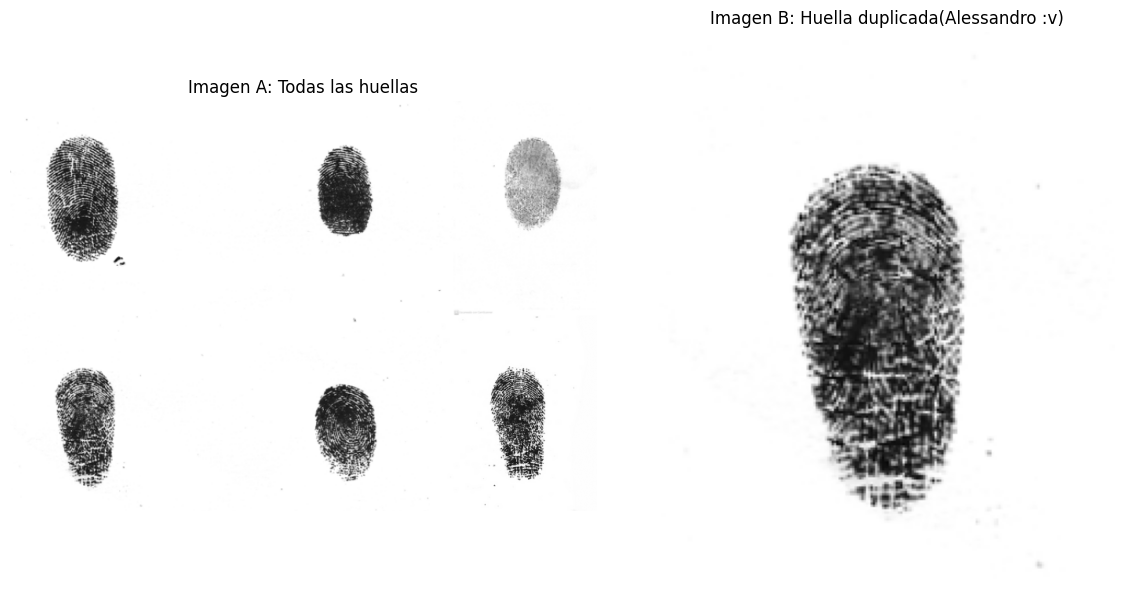

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imagen_A, cmap='gray')
plt.title('Imagen A: Todas las huellas')
plt.axis('off')

plt.subplot(122)
plt.imshow(imagen_B, cmap='gray')
plt.title('Imagen B: Huella duplicada(Alessandro :v)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Umbralización binaria
ret1, th1_A = cv2.threshold(imagen_A, 127, 255, cv2.THRESH_BINARY)
ret1, th1_B = cv2.threshold(imagen_B, 127, 255, cv2.THRESH_BINARY)

# Umbralización adaptativa con media
th2_A = cv2.adaptiveThreshold(imagen_A, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                            cv2.THRESH_BINARY, 11, 2)
th2_B = cv2.adaptiveThreshold(imagen_B, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                            cv2.THRESH_BINARY, 11, 2)

# Umbralización adaptativa con gaussiana
th3_A = cv2.adaptiveThreshold(imagen_A, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                            cv2.THRESH_BINARY, 11, 2)
th3_B = cv2.adaptiveThreshold(imagen_B, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                            cv2.THRESH_BINARY, 11, 2)

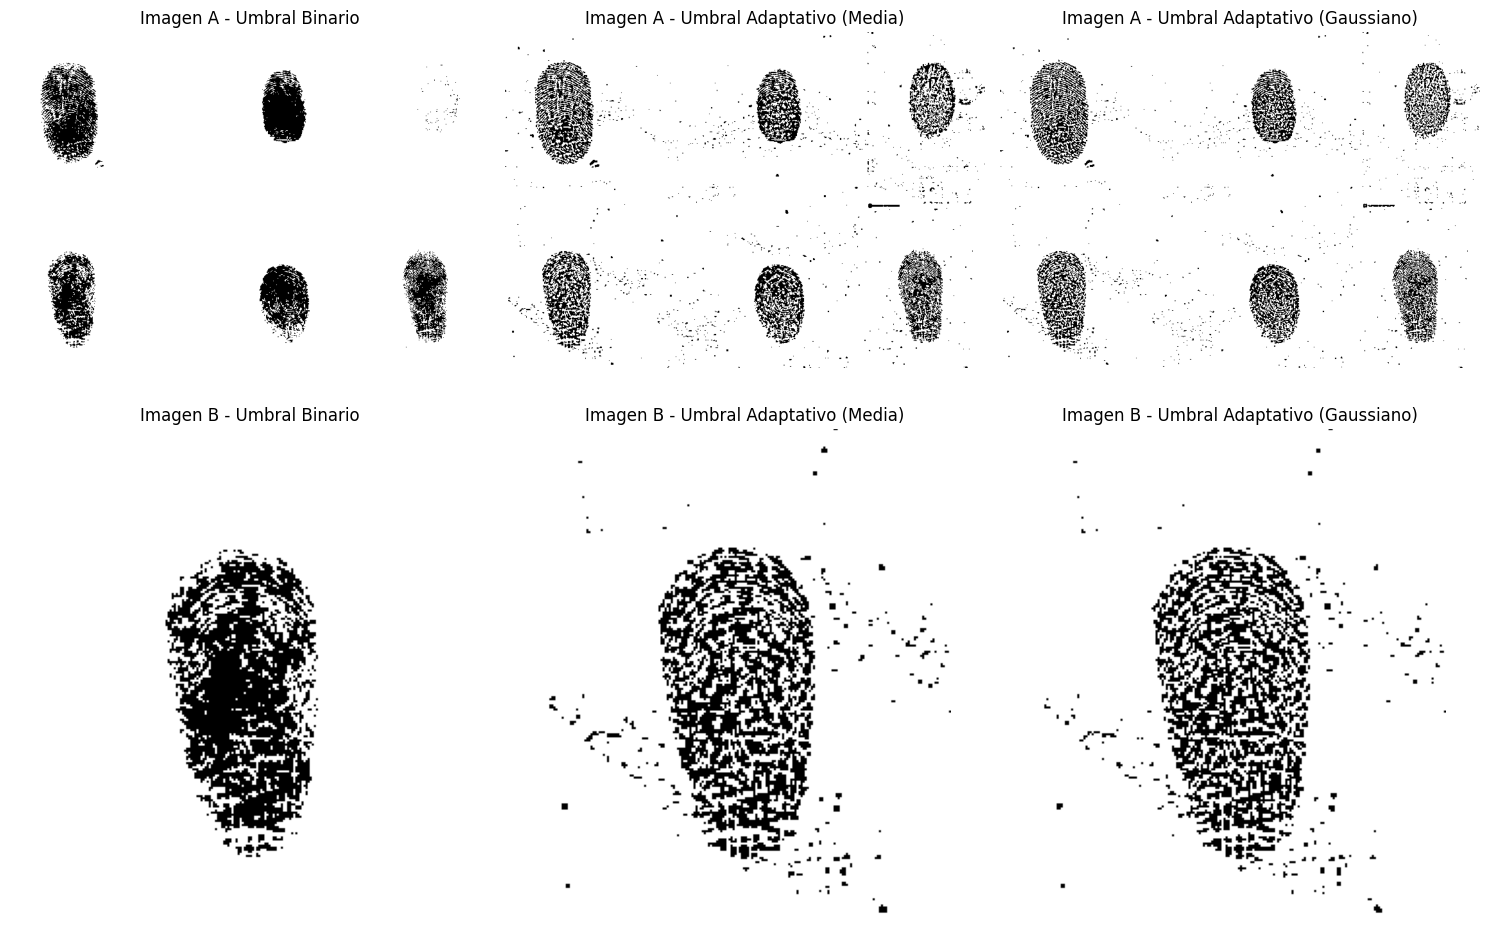

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(th1_A, cmap='gray')
plt.title('Imagen A - Umbral Binario')
plt.axis('off')

plt.subplot(232)
plt.imshow(th2_A, cmap='gray')
plt.title('Imagen A - Umbral Adaptativo (Media)')
plt.axis('off')

plt.subplot(233)
plt.imshow(th3_A, cmap='gray')
plt.title('Imagen A - Umbral Adaptativo (Gaussiano)')
plt.axis('off')

plt.subplot(234)
plt.imshow(th1_B, cmap='gray')
plt.title('Imagen B - Umbral Binario')
plt.axis('off')

plt.subplot(235)
plt.imshow(th2_B, cmap='gray')
plt.title('Imagen B - Umbral Adaptativo (Media)')
plt.axis('off')

plt.subplot(236)
plt.imshow(th3_B, cmap='gray')
plt.title('Imagen B - Umbral Adaptativo (Gaussiano)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
def detectar(a, b):
    result = match_template(a, b, pad_input=True)
    y_peak, x_peak = np.unravel_index(np.argmax(result), result.shape)

    h, w = b.shape
    x = int(x_peak - w/2)
    y = int(y_peak - h/2)

    
    x = max(x, 0)
    y = max(y, 0)
    x2 = min(x + w, a.shape[1])
    y2 = min(y + h, a.shape[0])

    im_color = cv2.cvtColor(a, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(im_color, (x, y), (x2, y2), (0, 255, 0), 2)

    corr = result[y_peak, x_peak]
    return im_color, corr

In [29]:
det, corr = detectar(imagen_A, imagen_B)
det_binario, corr_binario = detectar(th1_A, th1_B)
det_media, corr_media = detectar(th2_A, th2_B)
det_gauss, corr_gauss = detectar(th3_A, th3_B)


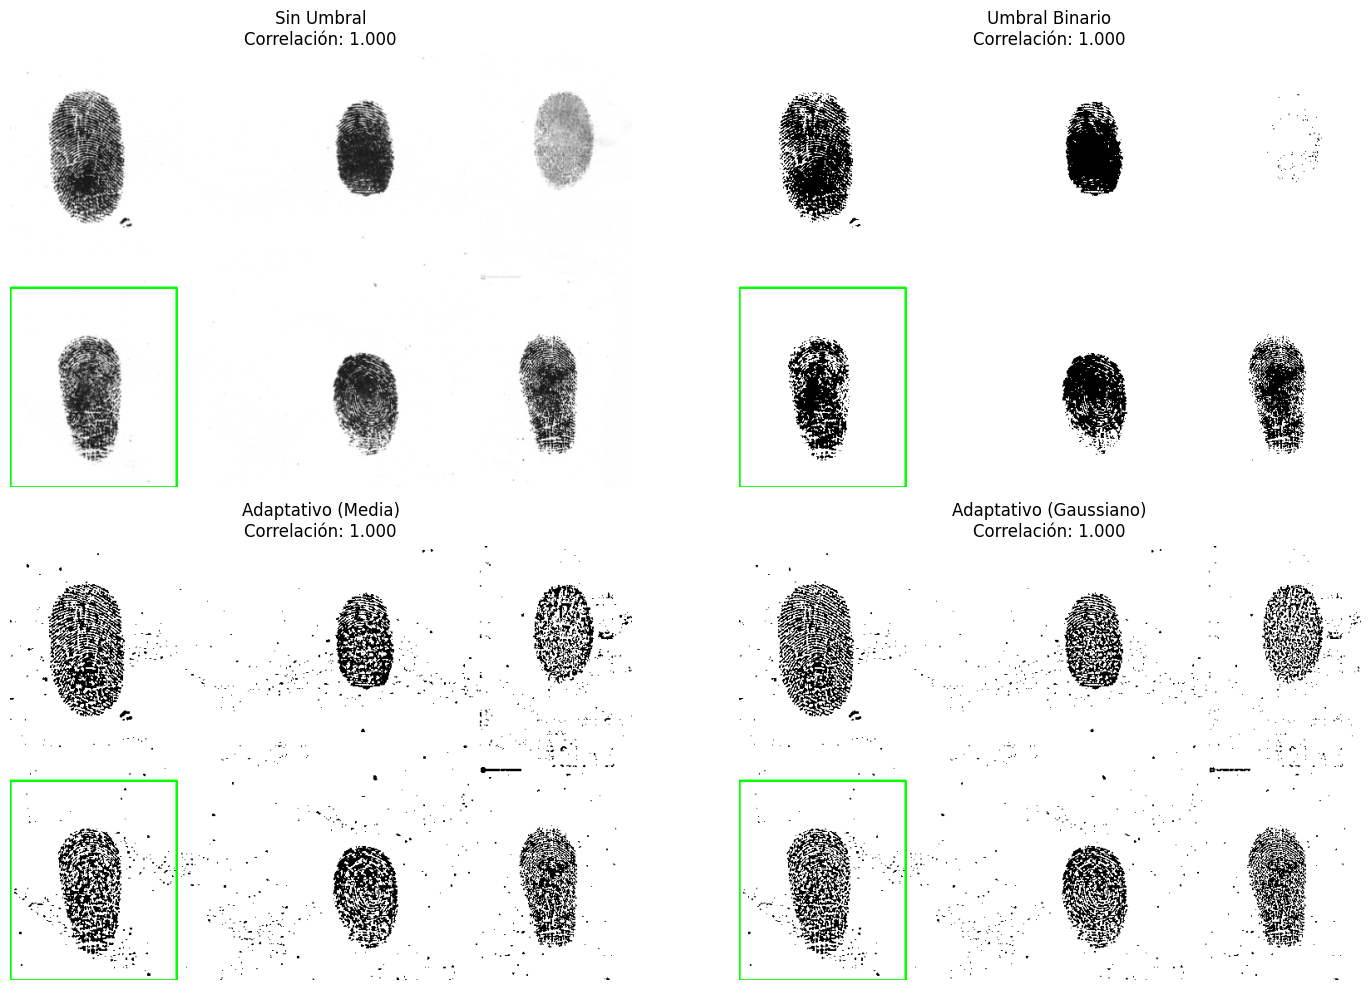

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(det)
plt.title(f'Sin Umbral\nCorrelación: {corr:.3f}')
plt.axis('off')

plt.subplot(222)
plt.imshow(det_binario)
plt.title(f'Umbral Binario\nCorrelación: {corr_binario:.3f}')
plt.axis('off')

plt.subplot(223)
plt.imshow(det_media)
plt.title(f'Adaptativo (Media)\nCorrelación: {corr_media:.3f}')
plt.axis('off')

plt.subplot(224)
plt.imshow(det_gauss)
plt.title(f'Adaptativo (Gaussiano)\nCorrelación: {corr_gauss:.3f}')
plt.axis('off')

plt.tight_layout()
plt.show()